In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing

In [220]:
x, y = make_blobs(n_samples=2000, n_features=3, random_state = 0)
x.shape

(2000, 3)

In [221]:
model = LogisticRegression(solver='liblinear', C=0.5, random_state=0)
model.fit(x, y)

LogisticRegression(C=0.5, random_state=0, solver='liblinear')

In [222]:
print("Classes: ", model.classes_)
print("Intercept: ",model.intercept_)
print("Coef: ",model.coef_)

Classes:  [0 1 2]
Intercept:  [ 2.39364995  0.83711482 -6.69719467]
Coef:  [[ 1.06500161  1.9696823  -2.68626591]
 [ 0.32790111 -2.7989838   0.86312894]
 [-1.09858113  0.29569617  0.89552164]]


In [223]:
print("Probability estimates:","\n",model.predict_proba(x))

Probability estimates: 
 [[2.23659104e-05 9.68797480e-01 3.11801541e-02]
 [2.72326037e-04 1.94141589e-06 9.99725733e-01]
 [1.50018218e-03 9.98112298e-01 3.87519685e-04]
 ...
 [3.50296359e-02 9.63487049e-01 1.48331560e-03]
 [5.13977375e-04 2.78174864e-07 9.99485744e-01]
 [7.52868712e-03 9.92240222e-01 2.31090945e-04]]


In [224]:
print("Actual (class) predictions:","\n",model.predict(x))

Actual (class) predictions: 
 [1 2 1 ... 1 2 1]


In [225]:
#Confusion Matrix
y_pred = model.predict(x)
confusion_matrix(y, y_pred)

array([[662,   4,   1],
       [  3, 664,   0],
       [  0,   0, 666]], dtype=int64)

In [226]:
y_pred = model.predict(x)
print(classification_report(y,y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       667
           1       0.99      1.00      0.99       667
           2       1.00      1.00      1.00       666

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [227]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [228]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 1.0
Accuracy of test: 0.9966666666666667


In [229]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       192
           1       1.00      1.00      1.00       204
           2       1.00      1.00      1.00       204

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [230]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.9966299019607843
Recall = 0.9966299019607843
Accuracy = 0.9966666666666667
F1 Score = 0.9966299019607843


NameError: name 'categories' is not defined

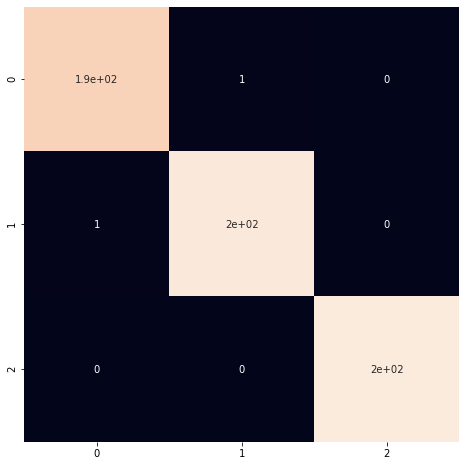

In [231]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

In [ ]:
preds = model.predict(dmatrix_test)
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds

In [ ]:
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_preds)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000,2000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

clf = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))